In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('../data/SALES.txt', sep='   ', header=None, engine='python')
x, y = df[0].to_numpy().reshape(-1, 1), df[1].to_numpy().reshape(-1, 1)

In [29]:
class LinearRegression:
    def __init__(self) -> None:
        self.w = None
    
    def fit(self, x, y):
        # Fit the model using the normal equation
        self.w = np.linalg.inv(x.T @ x) @ x.T @ y

    def predict(self, x):
        # Make predictions
        return x @ self.w
    
    def estimate_sigma(self, x, y):
        # Estimate the variance of the residuals (sigma^2)
        residuals = y - self.predict(x)
        n = len(y)
        sigma_squared = (residuals.T @ residuals) / n
        return sigma_squared

In [30]:
linearRegressor = LinearRegression()
linearRegressor.fit(x, y)
y_pred = linearRegressor.predict(x)
sigma = linearRegressor.estimate_sigma(x, y)



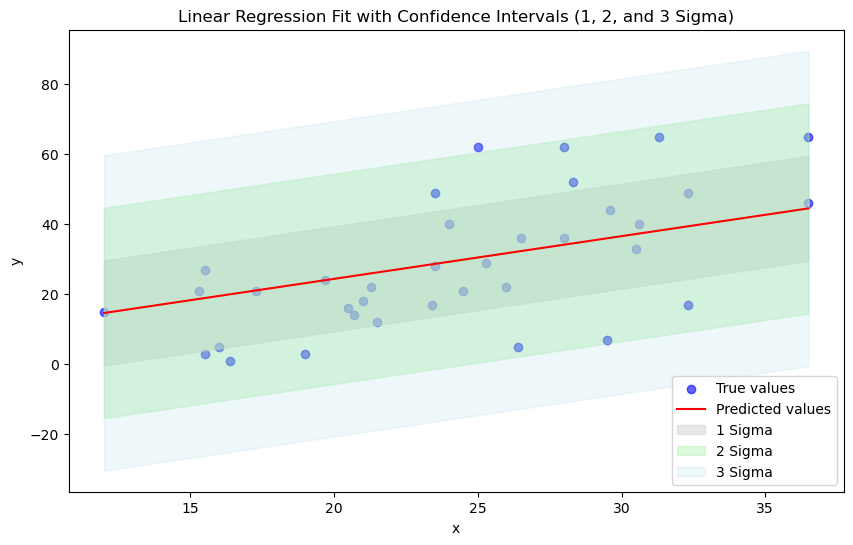

In [31]:
# %%
# Flatten x, y, and y_pred to 1D arrays for plotting
x_flat = x.flatten()
y_flat = y.flatten()
y_pred_flat = y_pred.flatten()
sigma_value = np.sqrt(sigma).flatten()[0]

# Create confidence intervals
y_upper_1sigma = y_pred_flat + sigma_value
y_lower_1sigma = y_pred_flat - sigma_value

y_upper_2sigma = y_pred_flat + 2 * sigma_value
y_lower_2sigma = y_pred_flat - 2 * sigma_value

y_upper_3sigma = y_pred_flat + 3 * sigma_value
y_lower_3sigma = y_pred_flat - 3 * sigma_value

# Sort x and the corresponding values for a smooth plot
sorted_indices = np.argsort(x_flat)
x_sorted = x_flat[sorted_indices]
y_pred_sorted = y_pred_flat[sorted_indices]
y_upper_1sigma_sorted = y_upper_1sigma[sorted_indices]
y_lower_1sigma_sorted = y_lower_1sigma[sorted_indices]
y_upper_2sigma_sorted = y_upper_2sigma[sorted_indices]
y_lower_2sigma_sorted = y_lower_2sigma[sorted_indices]
y_upper_3sigma_sorted = y_upper_3sigma[sorted_indices]
y_lower_3sigma_sorted = y_lower_3sigma[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_flat, y_flat, label='True values', color='blue', alpha=0.6)
plt.plot(x_sorted, y_pred_sorted, label='Predicted values', color='red')

# Fill between for 1-sigma, 2-sigma, and 3-sigma confidence intervals
plt.fill_between(x_sorted, y_lower_1sigma_sorted, y_upper_1sigma_sorted, color='lightgrey', alpha=0.5, label='1 Sigma')
plt.fill_between(x_sorted, y_lower_2sigma_sorted, y_upper_2sigma_sorted, color='lightgreen', alpha=0.3, label='2 Sigma')
plt.fill_between(x_sorted, y_lower_3sigma_sorted, y_upper_3sigma_sorted, color='lightblue', alpha=0.2, label='3 Sigma')

plt.title('Linear Regression Fit with Confidence Intervals (1, 2, and 3 Sigma)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
